In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.interpolate import spline
from matplotlib.backends.backend_agg import FigureCanvasAgg
import seaborn as sns

%matplotlib notebook
plt.style.use('seaborn-colorblind')

In [2]:

Stockprice = pd.read_csv("HistoricalQuotesWFC.csv", header=0, names=['date', 'Closing Price', 'Trading Vol', 'Opening Price', 'High', 'Low'])
Stockprice['Date'] = pd.to_datetime(Stockprice['date'])

Complaints = pd.read_csv("complaintsWFC.csv")
Complaints['Date Received'] = pd.to_datetime(Complaints['Date received'])

Comp_freq = pd.DataFrame(Complaints.groupby(['Date Received'], sort=True)['Complaint ID'].count())
Stockprice = pd.merge(Stockprice, Comp_freq, how='left', left_on='Date', right_on='Date Received')
Stockprice = Stockprice.dropna()
Stockprice = Stockprice.rename(columns={'Complaint ID' : 'CFPB Complaints Received'})


/Users/Neha/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


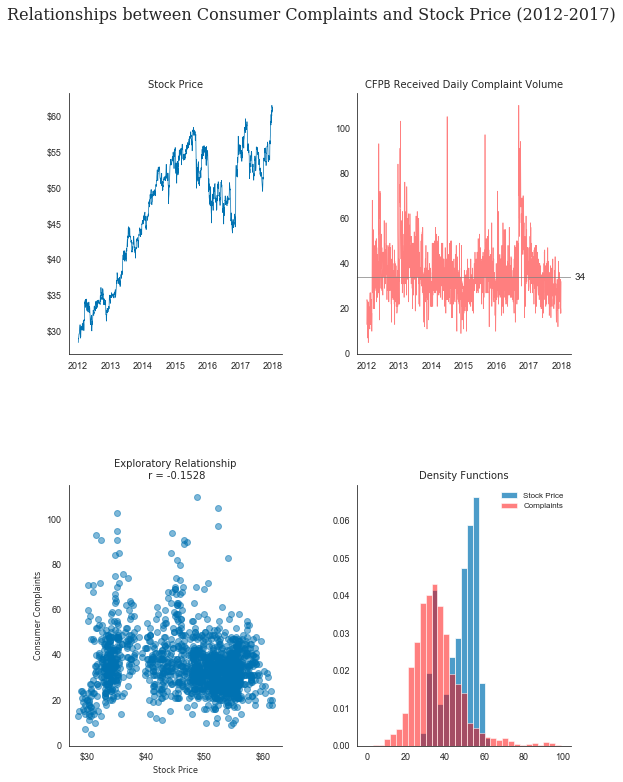

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, subplot_kw={'frameon':'False'}, figsize=(9, 12))
plt.suptitle('Relationships between Consumer Complaints and Stock Price (2012-2017)', fontsize=16, **{'fontname':'serif'})
plt.subplots_adjust(hspace=0.5, wspace=0.35)
ax_font={'fontname':'Helvetica'}

ax1.plot(Stockprice['Date'], Stockprice['Closing Price'], linewidth=0.7, label='Stock Price')
ax1.set_title('Stock Price', fontsize=10, **ax_font)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='x', labelsize=9)
ax1.tick_params(axis='y', labelsize=9)
    

ax2.plot(Stockprice['Date'], Stockprice['CFPB Complaints Received'], linewidth=0.7, color='r', alpha=0.5)
ax2.set_title('CFPB Received Daily Complaint Volume', fontsize=10, **ax_font )
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
Comp_median = Stockprice['CFPB Complaints Received'].median()
ax2.axhline(Comp_median, color='grey', label='Max', linewidth=0.7)
ax2.text(1.02, Comp_median, int(Comp_median), va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
    transform=ax2.get_yaxis_transform())    
ax2.tick_params(axis='x', labelsize=9)
ax2.tick_params(axis='y', labelsize=9)

PriceCorr=Stockprice['Closing Price'].corr(Stockprice['CFPB Complaints Received'])
ax3.scatter(Stockprice['Closing Price'], Stockprice['CFPB Complaints Received'], alpha=0.5)
ax3.set_title('Exploratory Relationship\n r = {0:.4f}'.format(PriceCorr), fontsize=10, **ax_font)
ax3.set_xlabel('Stock Price', fontsize=8, **ax_font)
ax3.set_ylabel('Consumer Complaints', fontsize=8, **ax_font)
ax3.xaxis.set_major_formatter(tick)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.tick_params(axis='x', labelsize=9)
ax3.tick_params(axis='y', labelsize=9)

ax4.hist(Stockprice['Closing Price'], alpha=0.7, bins=np.arange(0,100,3), density=True, label='Stock Price');
ax4.hist(Stockprice['CFPB Complaints Received'], alpha=0.5, bins=np.arange(0,100,3), density=True, label='Complaints', color='r');
ax4.set_title('Density Functions', fontsize=10, **ax_font)
ax4.legend(loc='upper right', frameon=False, fontsize=8)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.tick_params(axis='x', labelsize=9)
ax4.tick_params(axis='y', labelsize=9)

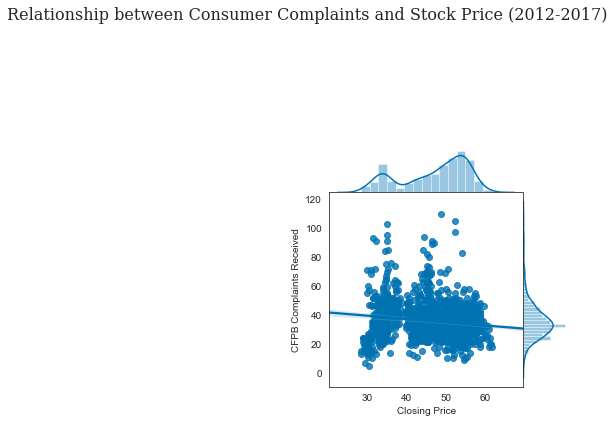

In [8]:
sns.set_style('white')
grid=sns.jointplot(Stockprice['Closing Price'], Stockprice['CFPB Complaints Received'], kind='reg')
plt.suptitle('Relationship between Consumer Complaints and Stock Price (2012-2017)', fontsize=16, **{'fontname':'serif'})

for A in grid.fig.axes:
    fig._axstack.add(fig._make_key(A), A)

fig.axes[0].set_position([0.1, 0.675, 0.35, 0.25])
fig.axes[1].set_position([0.6, 0.675, 0.35, 0.25])
fig.axes[2].set_position([0.1, 0.35, 0.35, 0.25])
fig.axes[3].set_position([0.6, 0.35, 0.35, 0.25])

fig.axes[4].set_position([0.55, 0.1, 0.45,  0.45])
fig.axes[5].set_position([0.55, 0.55, 0.45, 0.1])
fig.axes[6].set_position([1, 0.1, 0.1, 0.45])


In [9]:
canvas = FigureCanvasAgg(fig)
canvas.print_png('Assignment4.png')

/Users/Neha/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [10]:
%%html
<img src='Assignment4.png' />